In [4]:
library(dplyr)
library(MASS)

rm(list = ls())

setwd("C:\\Users\\Dick Sang\\Desktop\\5. Data Analytics\\3. PolyU RA\\1. Projects\\3. Cust Value Chain Analysis\\4. Regression\\1. 2020-01\\3. analysis")
data <- read.csv("Data Input for Analysis.csv")

str(data)
######################################################
# 1. Test models by absolute word count
######################################################
#--- 1a. By original sales (Symbolic words drive sales)
model <- glm(Sales_K_Unit ~ Functional + 
                            Experimental +
                            Symbolic +
                            Cost +
                            Functional : Optimistic +
                            Experimental : Optimistic +
                            # Symbolic : Optimistic +
                            Cost : Optimistic +
                            Functional : Affective +
                            Experimental : Affective +
                            # Symbolic : Affective +
                            Cost : Affective
          , data = data)
null_model <- glm(Sales_K_Unit ~ 1, data = data)

final_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
# final_model <- stepAIC(model, direction="backward")

'data.frame':	23 obs. of  16 variables:
 $ Product                  : Factor w/ 23 levels "Apple Watch 2015",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Sales_K_Unit             : num  13600 11600 17700 22500 65400 ...
 $ Adj_Sales                : num  340 290 442 562 727 ...
 $ Functional               : int  632 24 219 153 129 431 26 190 246 445 ...
 $ Experimental             : int  746 29 316 198 169 153 35 163 193 752 ...
 $ Symbolic                 : int  12 4 3 2 3 0 1 10 10 12 ...
 $ Cost                     : int  89 8 64 59 22 77 3 74 68 79 ...
 $ Optimistic               : int  159 14 69 40 28 38 12 60 85 134 ...
 $ Affective                : int  78 6 39 19 16 19 3 18 25 63 ...
 $ Total_Word_Count         : Factor w/ 22 levels "1,189","1,638",..: 18 9 7 4 2 8 13 5 6 15 ...
 $ WC_Normalize_Functional  : num  0.0881 0.0712 0.0693 0.0697 0.0788 ...
 $ WC_Normalize_Experimental: num  0.104 0.0861 0.1 0.0902 0.1032 ...
 $ WC_Normalize_Symbolic    : num  0.001673 0.011869 0.00095 0.000911 0

In [5]:
summary(final_model)


Call:
glm(formula = Sales_K_Unit ~ Symbolic, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-107789   -43919   -17309    15495   185825  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    31494      23492   1.341    0.194  
Symbolic        5260       2701   1.947    0.065 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4974488937)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 1.0446e+11  on 21  degrees of freedom
AIC: 582.71

Number of Fisher Scoring iterations: 2


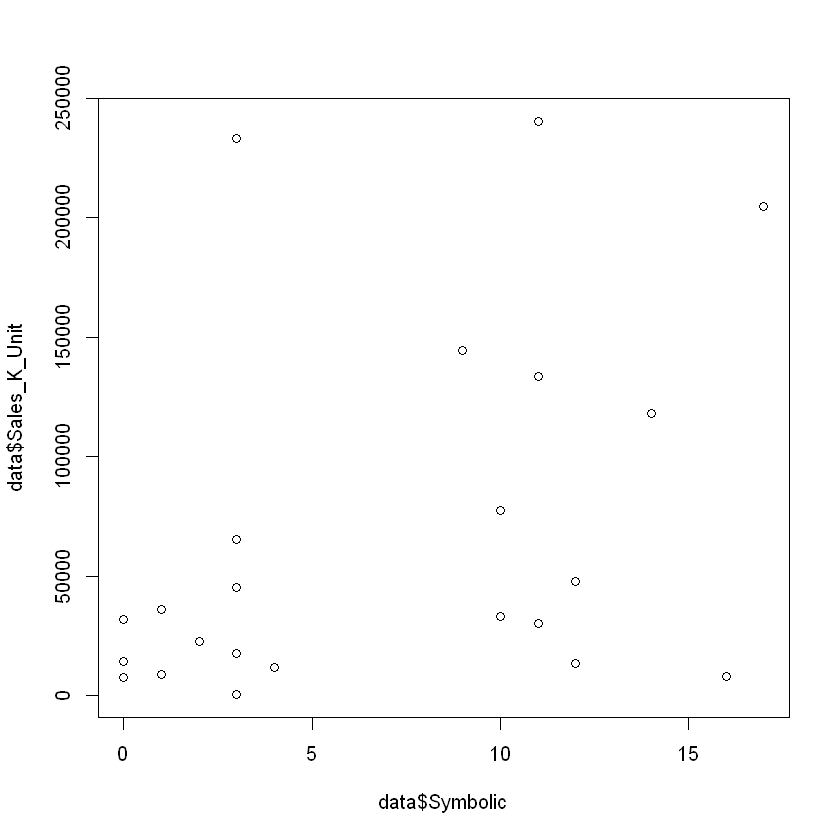

In [6]:
plot(data$Symbolic, data$Sales_K_Unit)
# plot(data$Symbolic * data$Affective, data$Sales_K_Unit)
# plot(data$Symbolic * data$Optimistic, data$Sales_K_Unit)

#--- 1b. By Adjusted sales (No variables are significant - Not studied further)
# model <- glm(Adj_Sales ~ Functional + Experimental + Symbolic+ Cost, data = data)
# null_model <- glm(Adj_Sales ~ 1, data = data)
# 
# fwd_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
# 
# summary(fwd_model)

In [7]:
######################################################
# 2. Test models by absolute word count %
######################################################
#--- 2a. By original sales (Normalized Cost words drive sales)
model <- glm(Sales_K_Unit ~ WC_Normalize_Functional + 
                            WC_Normalize_Experimental + 
                            WC_Normalize_Symbolic + 
                            WC_Normalize_Cost +
                            WC_Normalize_Functional: WC_Normalize_Optimistic+ 
                            WC_Normalize_Experimental: WC_Normalize_Optimistic+ 
                            WC_Normalize_Symbolic: WC_Normalize_Optimistic+ 
                            WC_Normalize_Cost: WC_Normalize_Optimistic+
                            WC_Normalize_Functional: WC_Normalize_Affective+ 
                            WC_Normalize_Experimental: WC_Normalize_Affective+ 
                            WC_Normalize_Symbolic: WC_Normalize_Affective+ 
                            WC_Normalize_Cost: WC_Normalize_Affective
             , data = data)

null_model <- glm(Sales_K_Unit ~ 1, data = data)

final_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))

Start:  AIC=584.53
Sales_K_Unit ~ 1

                            Df   Deviance    AIC
+ WC_Normalize_Cost          1 1.0176e+11 582.11
<none>                         1.2333e+11 584.53
+ WC_Normalize_Functional    1 1.2208e+11 586.30
+ WC_Normalize_Experimental  1 1.2277e+11 586.43
+ WC_Normalize_Symbolic      1 1.2333e+11 586.53

Step:  AIC=582.11
Sales_K_Unit ~ WC_Normalize_Cost

                                            Df   Deviance    AIC
<none>                                         1.0176e+11 582.11
+ WC_Normalize_Cost:WC_Normalize_Optimistic  1 9.9713e+10 583.64
+ WC_Normalize_Experimental                  1 9.9893e+10 583.68
+ WC_Normalize_Cost:WC_Normalize_Affective   1 9.9991e+10 583.71
+ WC_Normalize_Functional                    1 1.0150e+11 584.05
+ WC_Normalize_Symbolic                      1 1.0167e+11 584.09


In [8]:
# display model parameters
summary(final_model)


Call:
glm(formula = Sales_K_Unit ~ WC_Normalize_Cost, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-78994  -47445  -19367   45515  168017  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         133280      34529    3.86 0.000908 ***
WC_Normalize_Cost -3416998    1619375   -2.11 0.047022 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4845558234)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 1.0176e+11  on 21  degrees of freedom
AIC: 582.11

Number of Fisher Scoring iterations: 2


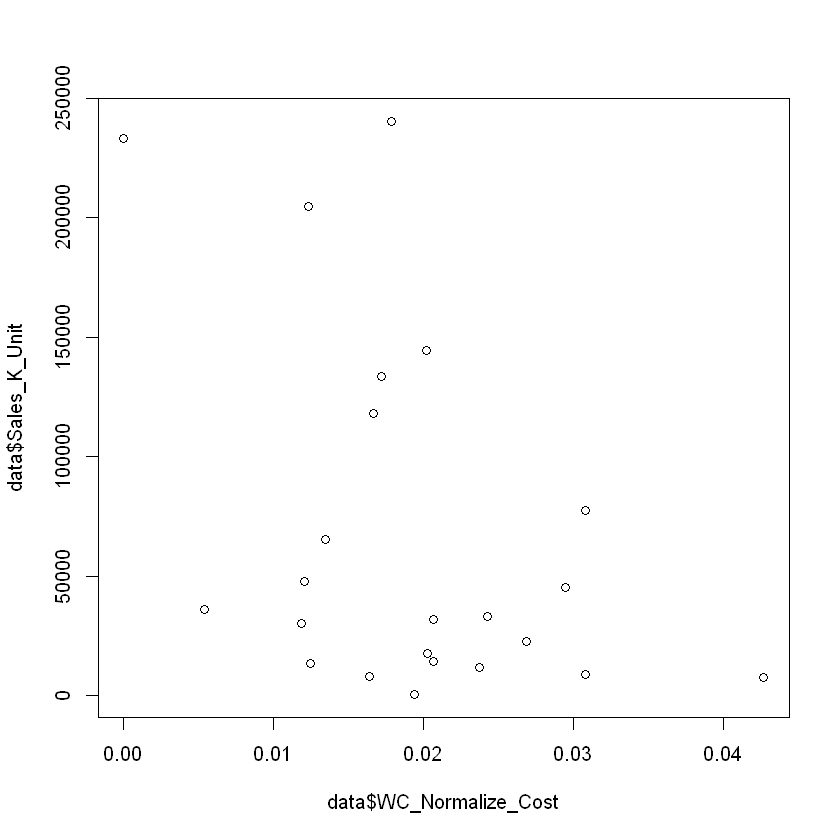

In [9]:
plot(data$WC_Normalize_Cost, data$Sales_K_Unit)

#--- 2b. By Adjusted sales (No variables are significant - Not studied further)
# model <- glm(Adj_Sales ~ WC_Normalize_Functional + 
#                          WC_Normalize_Experimental + 
#                          WC_Normalize_Symbolic+ 
#                          WC_Normalize_Cost, data = data)
# 
# null_model <- glm(Adj_Sales ~ 1, data = data)
# 
# fwd_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
# 
# summary(fwd_model)

In [10]:
######################################################
# 3. Composite model from 1, 2 (All Not significant)
######################################################
model2 <- glm(Sales_K_Unit ~ Symbolic +
                             WC_Normalize_Cost
              , data = data)

summary(model2)

#-- cannot combine
model3 <- glm(Sales_K_Unit ~ Symbolic +
                             Cost
              , data = data)

summary(model3)

#-- cannot combine
model4 <- glm(Sales_K_Unit ~ WC_Normalize_Symbolic +
                             WC_Normalize_Cost
              , data = data)

summary(model4)


Call:
glm(formula = Sales_K_Unit ~ Symbolic + WC_Normalize_Cost, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-103301   -39874    -5406    29241   152631  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)          92773      43991   2.109   0.0478 *
Symbolic              3911       2731   1.432   0.1675  
WC_Normalize_Cost -2694436    1658863  -1.624   0.1200  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4614504668)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 9.2290e+10  on 20  degrees of freedom
AIC: 581.86

Number of Fisher Scoring iterations: 2



Call:
glm(formula = Sales_K_Unit ~ Symbolic + Cost, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-107199   -40347   -21466    15516   190802  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  28151.9    28522.5   0.987    0.335
Symbolic      4715.3     3727.4   1.265    0.220
Cost           108.2      496.6   0.218    0.830

(Dispersion parameter for gaussian family taken to be 5210850127)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 1.0422e+11  on 20  degrees of freedom
AIC: 584.66

Number of Fisher Scoring iterations: 2



Call:
glm(formula = Sales_K_Unit ~ WC_Normalize_Symbolic + WC_Normalize_Cost, 
    data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-78572  -46080  -21453   45583  168815  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)             131984      36694   3.597   0.0018 **
WC_Normalize_Symbolic   537834    4057806   0.133   0.8959   
WC_Normalize_Cost     -3433530    1663321  -2.064   0.0522 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 5083371006)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 1.0167e+11  on 20  degrees of freedom
AIC: 584.09

Number of Fisher Scoring iterations: 2
